In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Корреляция и регрессия

In [3]:
water = pd.read_csv('water.csv')
water.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

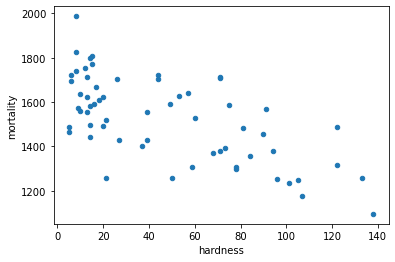

In [5]:
water.plot(kind='scatter', x='hardness', y='mortality')

In [6]:
# получается что есть некая обратная связь между жесткостью и смертностью


In [7]:
water[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
water[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
water[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Регрессия

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X = water[['hardness']]
y = water['mortality']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [15]:
model.coef_

array([-3.13167087])

In [16]:
model.intercept_

1668.9722977277095

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [18]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

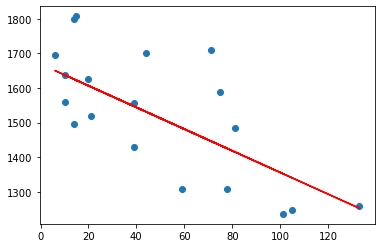

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [22]:
#график остатков
delta = (y_test-y_pred)

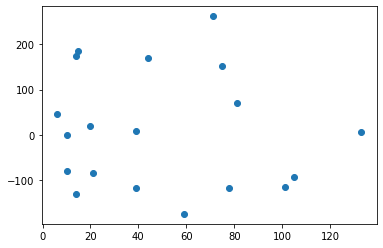

In [23]:
plt.scatter(X_test, delta)


In [32]:
south = water[water.location == 'South']
south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


In [33]:
north = water[water.location == 'North']
north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

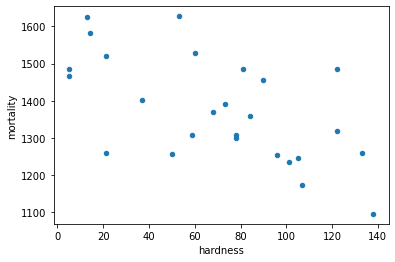

In [36]:
south.plot(kind='scatter', x='hardness', y='mortality')

In [34]:
south[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [37]:
south[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [38]:
south[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [39]:
#на юге корреляция чуть меньше

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

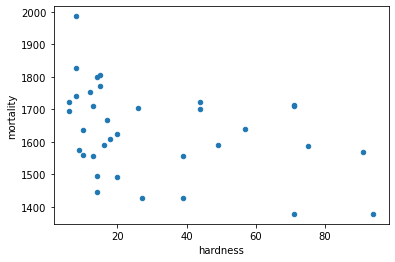

In [40]:
north.plot(kind='scatter', x='hardness', y='mortality')

In [41]:
north[['hardness','mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [42]:
north[['hardness','mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [43]:
north[['hardness','mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [44]:
# а на севере совсем низкая

Регрессия юг

In [47]:
XS = south[['hardness']]
yS = south['mortality']

In [57]:
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size=0.2, random_state=42)

In [58]:
modelS = LinearRegression()
modelS.fit(XS_train, yS_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [59]:
modelS.coef_

array([-3.07466127])

In [60]:
modelS.intercept_

1595.4337548999538

In [61]:
yS_pred = modelS.predict(XS_test)
yS_pred

array([1220.32508018, 1580.06044856, 1272.59432174, 1220.32508018,
       1481.67128798, 1530.86586827])

In [62]:
#модель, судя по коэффициенту детерминации модель вышла не очень
model.score(XS_test, yS_test) # метод возвращает значение коэффициента детерминации

-2.6596611223388016

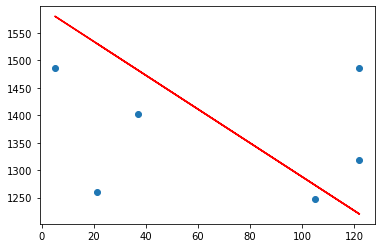

In [63]:
plt.scatter(XS_test, yS_test)
plt.plot(XS_test, yS_pred, c='r')

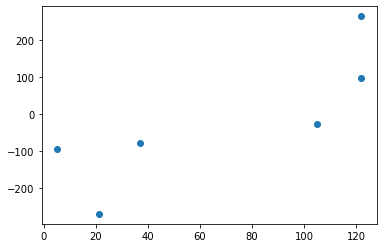

In [64]:
#график остатков
deltaS = (yS_test-yS_pred)
plt.scatter(XS_test, deltaS)

Регрессия север

In [66]:
XN = north[['hardness']]
yN = north['mortality']

In [67]:
XN_train, XN_test, yN_train, yN_test = train_test_split(XN, yN, test_size=0.2, random_state=42)

In [68]:
modelN= LinearRegression()
modelN.fit(XN_train, yN_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [69]:
modelN.coef_

array([-2.25038888])

In [70]:
modelN.intercept_

1694.905301402942

In [78]:
yN_pred = modelN.predict(XN_test)
yN_pred

array([1676.90219034, 1674.65180145, 1663.39985704, 1681.4029681 ,
       1658.89907927, 1535.1276907 , 1595.88819055])

In [79]:
#а севере повыше коэффициент
modelN.score(XN_test, yN_test) # метод возвращает значение коэффициента детерминации

-0.18101539518829401

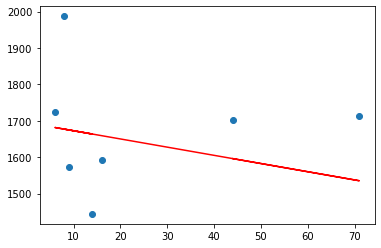

In [80]:
plt.scatter(XN_test, yN_test)
plt.plot(XN_test, yN_pred, c='r')

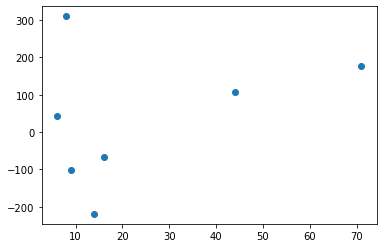

In [82]:
#график остатков
deltaN = (yN_test-yN_pred)
plt.scatter(XN_test, deltaN)